In [ ]:
class Perceptron:
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias
    def predict(self, inputs):
        weighted_sum = sum(w * x for w, x in zip(self.weights, inputs))
        return 1 if weighted_sum + self.bias > 0 else 0

In [ ]:
and_weights = [0.5, 0.5]
and_bias = -0.8
and_perceptron = Perceptron(and_weights, and_bias)

In [ ]:
print("AND Gate:")
print(f"AND(0, 0) = {and_perceptron.predict([0, 0])}")
print(f"AND(0, 1) = {and_perceptron.predict([0, 1])}")
print(f"AND(1, 0) = {and_perceptron.predict([1, 0])}")
print(f"AND(1, 1) = {and_perceptron.predict([1, 1])}")


AND Gate:
AND(0, 0) = 0
AND(0, 1) = 0
AND(1, 0) = 0
AND(1, 1) = 1


In [ ]:
or_weights = [0.5, 0.5]
or_bias = -0.3
or_perceptron = Perceptron(or_weights, or_bias)

In [ ]:
print("\nOR Gate:")
print(f"OR(0, 0) = {or_perceptron.predict([0, 0])}")
print(f"OR(0, 1) = {or_perceptron.predict([0, 1])}")
print(f"OR(1, 0) = {or_perceptron.predict([1, 0])}")
print(f"OR(1, 1) = {or_perceptron.predict([1, 1])}")


OR Gate:
OR(0, 0) = 0
OR(0, 1) = 1
OR(1, 0) = 1
OR(1, 1) = 1


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

In [ ]:
df = pd.read_csv("horseRacing.csv")
df.dropna(inplace=True)

In [ ]:
df['calc_position'] = df['calc_position'].apply(lambda x: 1 if x == 1 else 0)

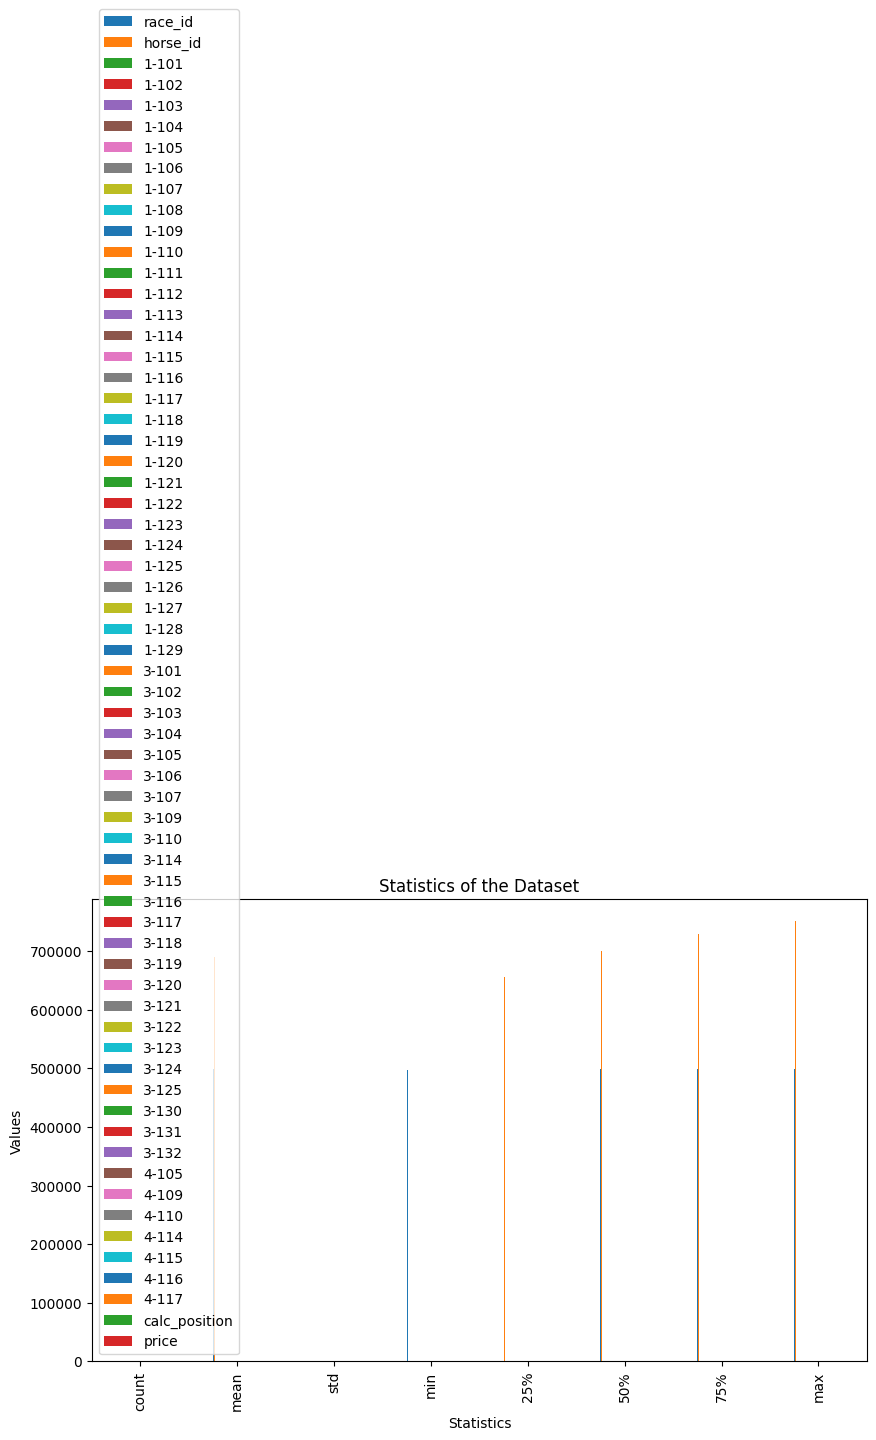

In [ ]:
df.describe().plot(kind='bar', figsize=(10, 6))
plt.title("Statistics of the Dataset")
plt.ylabel("Values")
plt.xlabel("Statistics")
plt.show()

In [ ]:
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [ ]:
race_encoder = OneHotEncoder()
race_encoded = race_encoder.fit_transform(df_imputed[['race_id']])
race_encoded_df = pd.DataFrame(race_encoded.toarray(), columns=race_encoder.get_feature_names_out(['race_id']))
df_imputed = pd.concat([df_imputed, race_encoded_df], axis=1)
df_imputed.drop(columns=['race_id'], inplace=True)
print(df.head())

     race_id  horse_id  1-101  1-102  1-103  1-104  1-105  1-106  1-107  \
278   497240    589032   1.10   0.52   0.45   0.35   0.27   1.62   2.23   
279   497240    658587   0.47   0.41  -0.54   0.94   0.78   0.28  -0.17   
280   497240    669234  -0.62  -1.20  -0.64   0.04  -0.27  -0.13  -0.80   
281   497240    693225  -0.55  -1.19  -1.23  -1.21  -1.09  -1.49  -1.13   
282   497240    693680  -0.87  -0.88  -0.75  -0.04  -0.32  -0.22  -0.75   

     1-108  ...  3-132  4-105  4-109  4-110  4-114  4-115  4-116  4-117  \
278   0.06  ...  -0.39  -0.47  -0.16   0.70  -0.61  -0.55  -0.71  -0.37   
279   0.94  ...  -0.39   2.85  -1.01  -1.01   1.83   1.85   1.77   2.59   
280  -0.81  ...  -0.39  -0.52  -0.16  -0.16   0.00  -0.18   0.00  -0.61   
281  -1.60  ...  -0.39  -0.44   0.70   0.70  -0.15  -0.37   0.00  -0.48   
282   0.59  ...  -0.39  -0.53  -0.16   0.70   0.46   0.18   0.35  -0.77   

     calc_position  price  
278              0   17.0  
279              0    7.0  
280           

In [ ]:
horse_encoder = OneHotEncoder()
horse_encoded = horse_encoder.fit_transform(df_imputed[['horse_id']])
horse_encoded_df = pd.DataFrame(horse_encoded.toarray(), columns=horse_encoder.get_feature_names_out(['horse_id']))
df_imputed = pd.concat([df_imputed, horse_encoded_df], axis=1)
df_imputed.drop(columns=['horse_id'], inplace=True)
print(df.head())

     race_id  horse_id  1-101  1-102  1-103  1-104  1-105  1-106  1-107  \
278   497240    589032   1.10   0.52   0.45   0.35   0.27   1.62   2.23   
279   497240    658587   0.47   0.41  -0.54   0.94   0.78   0.28  -0.17   
280   497240    669234  -0.62  -1.20  -0.64   0.04  -0.27  -0.13  -0.80   
281   497240    693225  -0.55  -1.19  -1.23  -1.21  -1.09  -1.49  -1.13   
282   497240    693680  -0.87  -0.88  -0.75  -0.04  -0.32  -0.22  -0.75   

     1-108  ...  3-132  4-105  4-109  4-110  4-114  4-115  4-116  4-117  \
278   0.06  ...  -0.39  -0.47  -0.16   0.70  -0.61  -0.55  -0.71  -0.37   
279   0.94  ...  -0.39   2.85  -1.01  -1.01   1.83   1.85   1.77   2.59   
280  -0.81  ...  -0.39  -0.52  -0.16  -0.16   0.00  -0.18   0.00  -0.61   
281  -1.60  ...  -0.39  -0.44   0.70   0.70  -0.15  -0.37   0.00  -0.48   
282   0.59  ...  -0.39  -0.53  -0.16   0.70   0.46   0.18   0.35  -0.77   

     calc_position  price  
278              0   17.0  
279              0    7.0  
280           

In [ ]:
X = df_imputed.drop(columns=['calc_position'])
y = df_imputed['calc_position']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', max_iter=500, random_state=42)
mlp_classifier.fit(X_train_scaled, y_train)
y_pred = mlp_classifier.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of MLP Classifier:", accuracy)


Accuracy of MLP Classifier: 0.896551724137931


One issue could be the imbalance of the target variable 'calc_position'. You can address it by either undersampling the majority class (position not 1) or oversampling the minority class (position 1).

DATA SET WAS TOO LARGE SO I CUTTED IT
